# Credit Card Fraud Detection With Logistic Regression

Data source: https://www.kaggle.com/mlg-ulb/creditcardfraud

## Introduction


<p align = "justify">Main target of this project is to create machine learning model which will be able to classify financial transaction as fraud or non fraud. Data will be cleaned, preprocessed and then balanced. All of these processes will improve model perfomance and classification accuracy. Dataset provided in link above includes about 284 thousand cases with only 492 fraud transaction. Every row of dataset contains information about time and amount of transactions. There are 28 more columns which are components produced by PCA preprocessing algorithm. <p>


## Libriaries and modules:


*   Pandas
*   Numpy
*   Seaborn
*   Matplotlib
*   Scikitlearn
*   LighGBM
*   XGBoost



## List of Contents:


1. Importring modules and loading dataset
2. Basic insights
3. Visualization before balancing
4. Balancing and sampling
5. Visualization of balanced data
6. Preprocessing and Feature Selection
7. Models initzialization and training
8. Models output and evaulation
9. Summary and best model deployment


# 1. Importring modules and loading dataset


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
%matplotlib inline

In [4]:
import os 
os.system('pip install -r requirements.txt')

0

In [5]:
fraud_dataset = pd.read_csv('creditcard.csv')

# 2. Basic inisghts

Sample

In [6]:
fraud_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Statistics

In [7]:
fraud_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Columns

In [8]:
pd.DataFrame(fraud_dataset.columns)

,0
0,Time
1,V1
2,V2
3,V3
4,V4
5,V5
6,V6
7,V7
8,V8
9,V9


In [9]:
print("Target class ratio:")
pd.DataFrame({'Amount':fraud_dataset['Class'].value_counts(),
              'Ratio': [round(fraud_dataset['Class'].value_counts()[0]/fraud_dataset['Class'].count()*100, 2)
                  , round(fraud_dataset['Class'].value_counts()[1]/fraud_dataset['Class'].count()*100, 2)]} )

Target class ratio:


,Amount,Ratio
0,284315,99.83
1,492,0.17


In [10]:
pd.DataFrame({"Ammount of Nan": fraud_dataset.isna().sum()})

,Ammount of Nan
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# 3. Visualization before balancing

In [11]:
sns.set()

Variables distribution

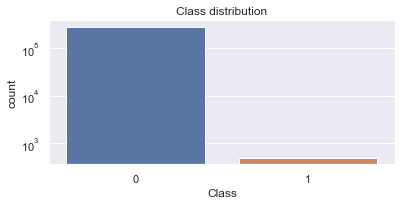

In [12]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes((.1, .4, .8, .5))
ax = sns.countplot(x=fraud_dataset['Class'])
ax.set_title("Class distribution")
ax.set_yscale("log")
plt.show()

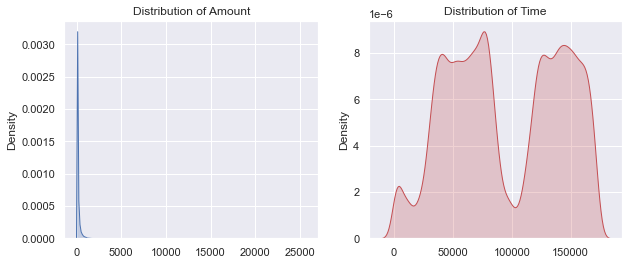

In [13]:
x1 = fraud_dataset['Amount'].values
x2 = fraud_dataset['Time'].values
fig , axes = plt.subplots(1, 2,figsize=(10, 4))

sns.kdeplot(ax=axes[0], shade=True, x=x1, color='b')
axes[0].set_title("Distribution of Amount")

sns.kdeplot(ax=axes[1], shade=True, x=x2, color='r')
axes[1].set_title("Distribution of Time")

plt.show()

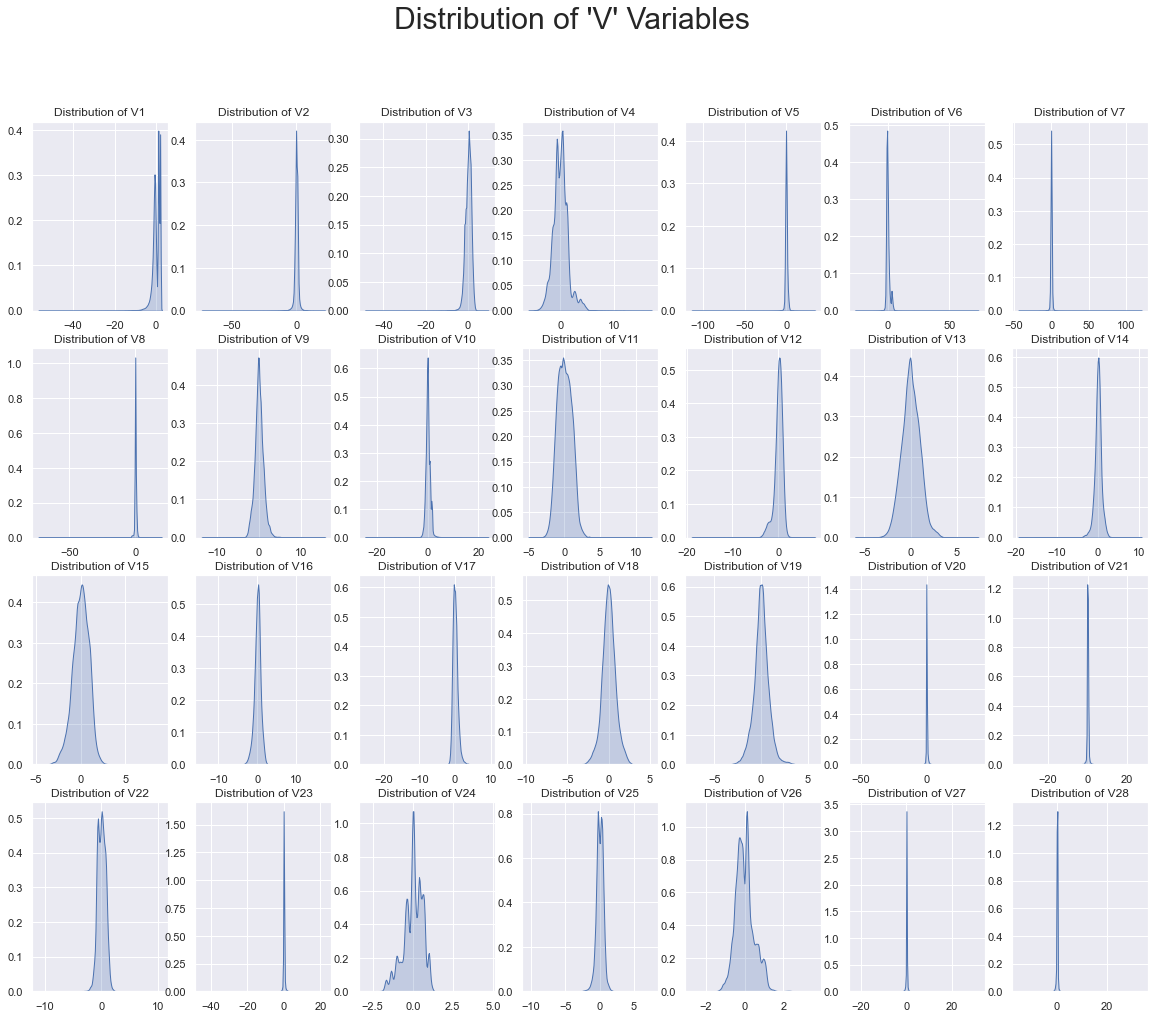

In [14]:
v_vars = pd.DataFrame(fraud_dataset.drop(['Amount', 'Time', 'Class'], axis=1))

fig, axes = plt.subplots(4, 7, figsize=(20, 16))
fig.suptitle("Distribution of 'V' Variables", fontsize=30)

k = 1

for i in range(4):
    for y in range(7):
        v = v_vars[f"V{k}"]
        sns.kdeplot(ax=axes[i][y], shade=True, x=v, color='b')
        axes[i][y].set_title(f"Distribution of V{k}")
        axes[i][y].set_ylabel("")
        axes[i][y].set_xlabel("")
        k += 1

plt.show()

Correlations

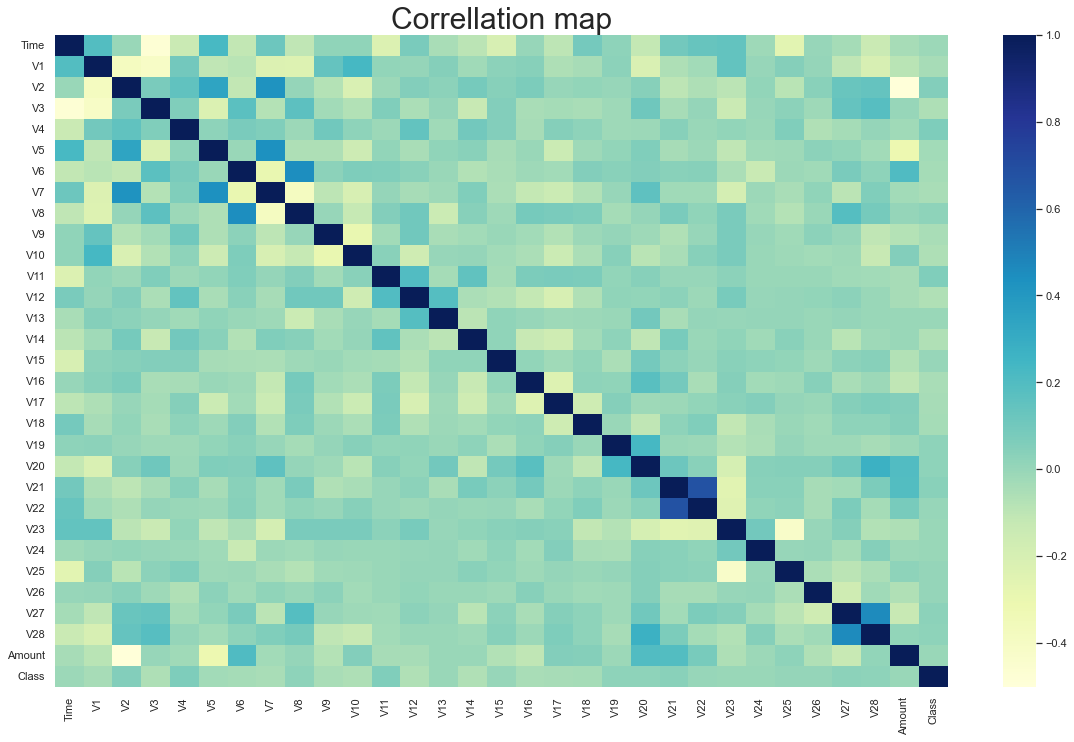

In [15]:
fig = plt.figure(figsize=(20, 12))
ax = sns.heatmap(fraud_dataset.corr(method='spearman'), cmap="YlGnBu")
ax.set_title("Correllation map", fontsize=30)
plt.show()

# 4. Balancing and sampling

In [16]:
fraud = fraud_dataset[fraud_dataset["Class"]==1]
non_fraud = fraud_dataset[fraud_dataset['Class']==0]

In [17]:
print(f"Fraud transactions: {len(fraud)}\nNon fraud transactions: {len(non_fraud)}")

Fraud transactions: 492
Non fraud transactions: 284315


## Sampling approach
<p align="justify">Inballance between fraud and non fraud cases is way too big. There two main techniques to deal with this type of datasets - oversampling and undersampling. Main con of undersampling is that we are losing information. Oversampling is not ideal at - we are randomly copying same cases so it may cause poor performance of machine learning model. In this case the ratio between class 0 and class 1 is 99.83 to 0.17. This in inballance will prevent any algoritm from making accurate predictions for minority class. To balance ratio between fraud and non fraud transaction undersampling will be applied - 5000 samples from class 0 will be kept. To reproduce required samples from class 1 synthetic minority oversampling technique (SMOTE).   <p>

In [18]:
print("Oversampling and undersampling")
final_size = 5000
non_fraud_undersample = non_fraud.sample(final_size)
print(f"Fraud subset size: {fraud.shape}\nNon fraud subset size: {non_fraud_undersample.shape}")

Oversampling and undersampling
Fraud subset size: (492, 31)
Non fraud subset size: (5000, 31)


In [20]:
fraud_dataset_undersampled = pd.concat([fraud, non_fraud_undersample], sort=True)

In [23]:
print(f'Size of undersampled dataset: {len(fraud_dataset_undersampled)}')

Size of undersampled dataset: 5492


#### Synthetic minority oversampling

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE(random_state=101)

In [27]:
X_under, y_under = fraud_dataset_undersampled.drop('Class', axis=1), fraud_dataset_undersampled['Class']

In [28]:
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)

In [31]:
X_resampled['Class'] = y_resampled
fraud_dataset_balanced = X_resampled

In [32]:
print("Concatenating subsets")

pd.DataFrame({'Amount':fraud_dataset_balanced['Class'].value_counts(),
              'Ratio': [round(fraud_dataset_balanced['Class'].value_counts()[0]/fraud_dataset_balanced['Class'].count()*100, 2)
                  , round(fraud_dataset_balanced['Class'].value_counts()[1]/fraud_dataset_balanced['Class'].count()*100, 2)]} )

Concatenating subsets


,Amount,Ratio
1,5000,50.0
0,5000,50.0


# 5. Visualization of balanced data

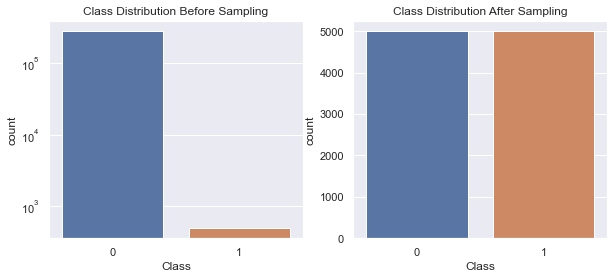

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(ax=axes[0], x=fraud_dataset['Class'])
axes[0].set_title("Class Distribution Before Sampling")
axes[0].set_yscale("log")

sns.countplot(ax=axes[1], x=fraud_dataset_balanced['Class'])
axes[1].set_title("Class Distribution After Sampling")
plt.show()

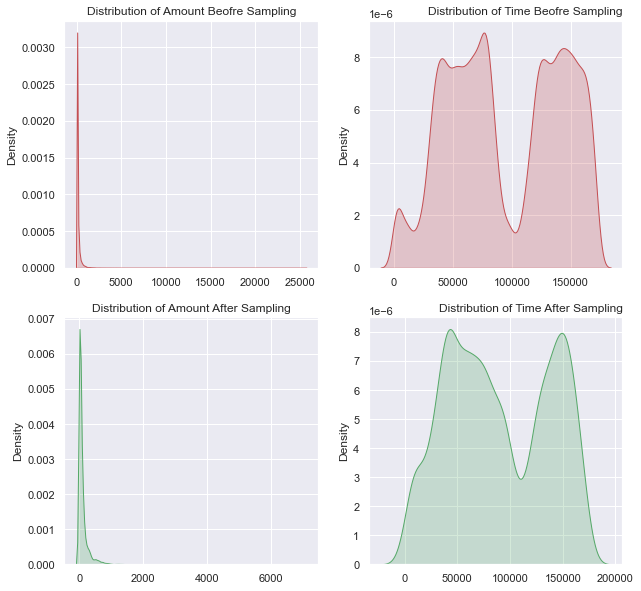

In [34]:
x1 = fraud_dataset['Amount'].values
x2 = fraud_dataset['Time'].values

x3 = fraud_dataset_balanced['Amount'].values
x4 = fraud_dataset_balanced['Time'].values


fig, axes = plt.subplots(2, 2, figsize=(10 ,10))


sns.kdeplot(ax=axes[0][0], shade=True, x=x1, color='r')
axes[0][0].set_title("Distribution of Amount Beofre Sampling")

sns.kdeplot(ax=axes[0][1], shade=True, x=x2, color='r')
axes[0][1].set_title("Distribution of Time Beofre Sampling", loc="right")

sns.kdeplot(ax=axes[1][0], shade=True, x=x3, color='g')
axes[1][0].set_title("Distribution of Amount After Sampling")

sns.kdeplot(ax=axes[1][1], shade=True, x=x4, color='g')
axes[1][1].set_title("Distribution of Time After Sampling", loc="right")

plt.show()

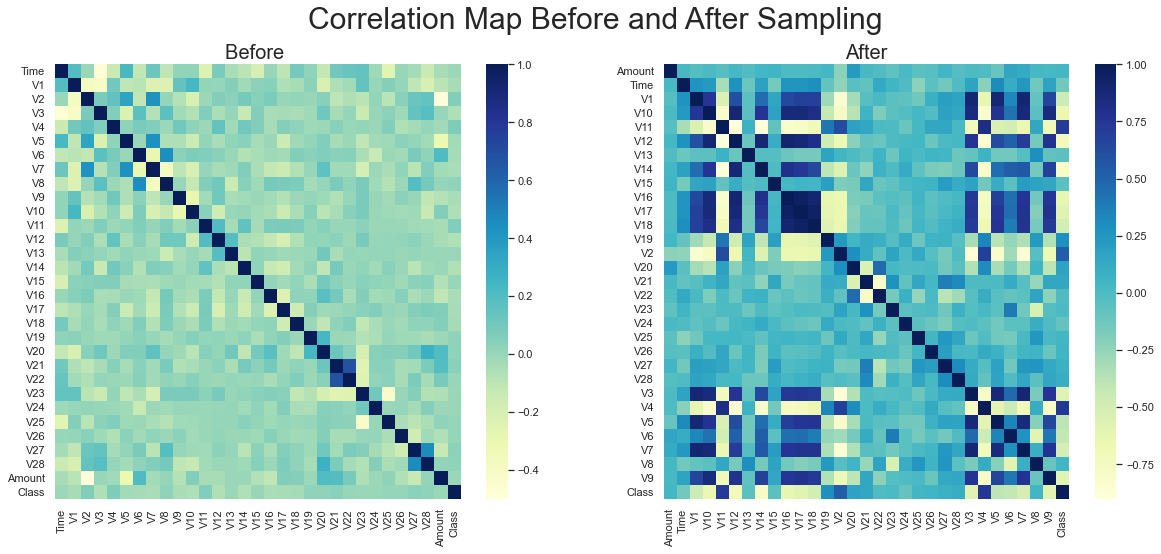

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Correlation Map Before and After Sampling", fontsize=30)

sns.heatmap(ax=axes[0], data=fraud_dataset.corr(method='spearman'), cmap="YlGnBu")
axes[0].set_title("Before ", fontsize=20)

sns.heatmap(ax=axes[1], data=fraud_dataset_balanced.corr(), cmap="YlGnBu")
axes[1].set_title("After", fontsize=20)

plt.show()

<p align="justify"> Charts above sohws that sampling process hasn't significantly changed distributions of idependent variables. What realy has been changed is relation between particular variables. Reliationships within the data became more visible and it would be easier to select most significant variables. For sure that will improve model performance. 
<p>

# 6. Preprocessing and Feature Selection

<p align="justify"> This dataset provides 30 features, so it would be necessary to pick most important ones. Skipping this proces can make model outcome less significant or overfitting can occur. 

Modules import

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

Data split

In [23]:
X = fraud_dataset_balanced.drop('Class', axis=1).values.tolist()
y = fraud_dataset_balanced['Class'].values.tolist()

Feature selection

In [24]:
feature_selection = SelectKBest(score_func=f_classif, k='all')
feature_selection.fit(X, y)

X = feature_selection.transform(X)

In [25]:
selection_results = pd.DataFrame({"Variable": fraud_dataset_balanced.drop("Class", axis=1).columns,
                                  "Score": feature_selection.scores_,
                                  "P-Value": feature_selection.pvalues_})
selection_results

,Variable,Score,P-Value
0,Amount,4.128471,4.229950e-02
1,Time,62.726484,3.906319e-15
2,V1,486.230219,1.267988e-96
3,V10,1267.754180,1.914702e-215
4,V11,1865.068393,2.285063e-288
5,V12,1824.756484,8.176507e-284
6,V13,5.527654,1.881488e-02
7,V14,2697.205903,0.000000e+00
8,V15,15.015689,1.100589e-04
9,V16,1085.447306,1.679952e-190


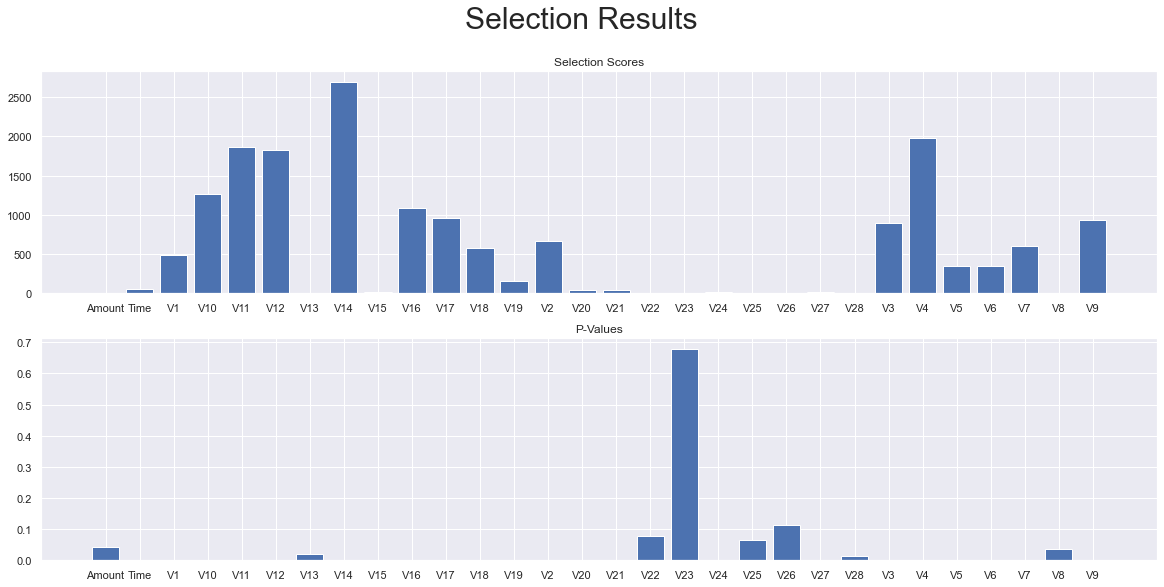

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(20, 9))
fig.suptitle("Selection Results", fontsize=30)

axes[0].bar(selection_results['Variable'].values, selection_results['Score'].values)
axes[0].set_title("Selection Scores")

axes[1].bar(selection_results['Variable'].values, selection_results['P-Value'].values)
axes[1].set_title("P-Values")
plt.show()

In [27]:
selection_results = selection_results[selection_results['P-Value']<0.005]
selected_columns = selection_results['Variable'].values.tolist()
X = fraud_dataset_balanced[selected_columns].values.tolist()

In [28]:
y = fraud_dataset_balanced['Class'].to_list()

Feature preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

Train test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

<p align='justify'> Faeture selection reduced dimensionality of source data, it will prevent model from being overfitted and biased. Data has been standarized and splited to two subsets. 
</p>

### 7. Models initzialization and training

Following algorithms will be used:
* Logistic Regression 
* Random Forrest Classifier 
* XGboost 
* Light GBM

Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

regularization_rate = 0.01

logistic_regression = LogisticRegression(C=1/regularization_rate, solver='liblinear')

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=100.0, solver='liblinear')

Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier


forest_params = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8,10],
    'criterion' :['gini', 'entropy']
}

random_forest = RandomForestClassifier(random_state=100)

grid_search = GridSearchCV(estimator=random_forest, param_grid=forest_params, cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 500]})

In [33]:
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 500}

In [34]:
random_forest = RandomForestClassifier(criterion='entropy', max_depth=10,
                             max_features='auto', n_estimators=200, random_state=101)

random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=101)

XG Boost

In [35]:
from xgboost import XGBClassifier

xgboost_params = {
    'n_estimators': [100, 200, 500],
    'gamma': [0.25, 0.5, 1, 2],
    'max_depth' : [4,6,8,10],
    'learning_rate': [0.01, 0.05, 0.1]
}

xgboost = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric = 'logloss')

grid_search = GridSearchCV(estimator=xgboost, param_grid=xgboost_params, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                             

In [36]:
grid_search.best_params_

{'gamma': 0.25, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}

In [37]:
xgboost = XGBClassifier(objective='binary:logistic', use_label_encoder=False,
                    eval_metric = 'logloss', gamma=0.5, learning_rate=0.1, max_depth=4, n_estimators=100 )
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Light GBM 

In [38]:
from lightgbm import LGBMClassifier

lgbm_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0.1, 0.25, 0.5],
    'reg_lambda': [0.1, 0.25, 0.5]
}

lgbm = LGBMClassifier(n_jobs=1)


grid_search = GridSearchCV(estimator=lgbm, param_grid=lgbm_params)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LGBMClassifier(n_jobs=1),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'reg_alpha': [0.1, 0.25, 0.5],
                         'reg_lambda': [0.1, 0.25, 0.5]})

In [39]:
grid_search.best_params_

{'learning_rate': 0.01,
 'n_estimators': 500,
 'reg_alpha': 0.25,
 'reg_lambda': 0.1}

In [40]:
lgbm = LGBMClassifier(n_jobs=1, learning_rate=0.05, n_estimators=100, 
                        reg_alpha=0.1, reg_lambda=0.5)

lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, n_jobs=1, reg_alpha=0.1, reg_lambda=0.5)

### 8. Models output and evaulation

Sklearn metrics import 

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, \
    accuracy_score, roc_auc_score, average_precision_score, f1_score, recall_score

In [42]:
models = [logistic_regression, random_forest, xgboost, lgbm]

Creating predictions for validation dataset 

In [43]:
predict_lr = logistic_regression.predict(X_test)
predict_rfc = random_forest.predict(X_test)
predict_xgboost = xgboost.predict(X_test)
predict_lgbm = lgbm.predict(X_test)

matrix_lr = confusion_matrix(y_test , predict_lr)
matrix_rfc = confusion_matrix(y_test , predict_rfc)
matrix_xgboost = confusion_matrix(y_test , predict_xgboost)
matrix_lgbm = confusion_matrix(y_test , predict_lgbm)

Creating models metrics

In [44]:
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]
precisions = [average_precision_score(y_test, model.predict(X_test)) for model in models]
aucs = [roc_auc_score(y_test, model.predict(X_test)) for model in models]
f1s = [f1_score(y_test, model.predict(X_test)) for model in models]
recalls = [recall_score(y_test, model.predict(X_test)) for model in models]

Training evaulation

In [45]:
for model in models:
    print(f'Classification report for: {model.__class__.__name__}')
    print(classification_report(y_test, model.predict(X_test)))

Classification report for: LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       259
           1       0.98      0.92      0.95       241

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

Classification report for: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       259
           1       1.00      0.99      0.99       241

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500

Classification report for: XGBClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       259
           1       0.98      1.00      0.99       241

    accuracy                           0.99  

Text(0.5, 1.0, 'XG boost')

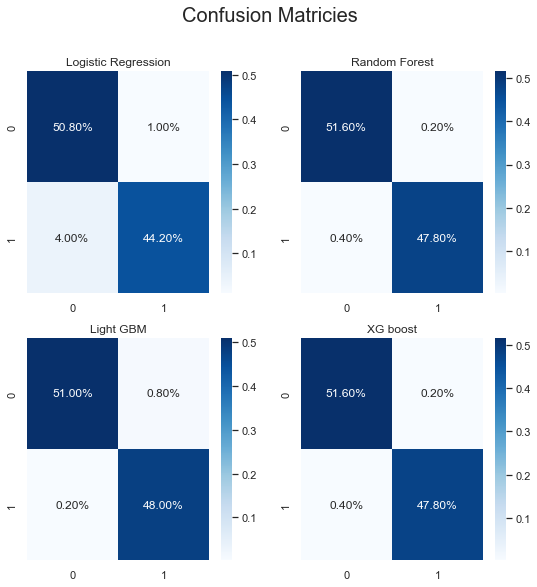

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.suptitle("Confusion Matricies", fontsize=20)



sns.heatmap(matrix_lr/np.sum(matrix_lr),ax=axes[0][0],  annot=True, 
            fmt='.2%', cmap='Blues')
axes[0][0].set_title("Logistic Regression")

sns.heatmap(matrix_rfc/np.sum(matrix_rfc),ax=axes[0][1],  annot=True, 
            fmt='.2%', cmap='Blues')
axes[0][1].set_title("Random Forest")

sns.heatmap(matrix_lgbm/np.sum(matrix_lgbm),ax=axes[1][0],  annot=True, 
            fmt='.2%', cmap='Blues')
axes[1][0].set_title("Light GBM")

sns.heatmap(matrix_rfc/np.sum(matrix_xgboost),ax=axes[1][1],  annot=True, 
            fmt='.2%', cmap='Blues')
axes[1][1].set_title("XG boost")

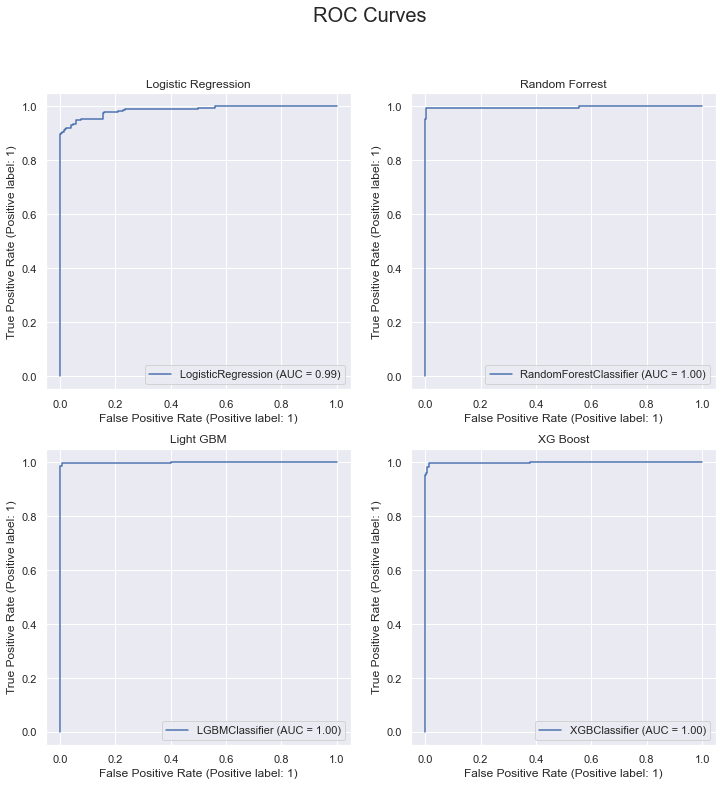

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("ROC Curves", fontsize=20)


RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test, ax=axes[0][0])
axes[0][0].set_title("Logistic Regression")

RocCurveDisplay.from_estimator(random_forest, X_test, y_test, ax=axes[0][1])
axes[0][1].set_title("Random Forrest")

RocCurveDisplay.from_estimator(lgbm, X_test, y_test, ax=axes[1][0])
axes[1][0].set_title("Light GBM")

RocCurveDisplay.from_estimator(xgboost, X_test, y_test, ax=axes[1][1])
axes[1][1].set_title("XG Boost")

plt.show()


In [48]:
print(f'Metrics comprassion')

pd.DataFrame({'Model':['Logistic Regression', 'Random Forrest', 'XG Boost', 'Light GBM'],
            'Accuracy': accuracies,
            'Precission':precisions,
            'AUC':aucs,
            'f1': f1s,
            'Recall': recalls})

Metrics comprassion


,Model,Accuracy,Precission,AUC,f1,Recall
0,Logistic Regression,0.950,0.936725,0.948854,0.946467,0.917012
1,Random Forrest,0.994,0.991569,0.993920,0.993763,0.991701
2,XG Boost,0.990,0.981525,0.990203,0.989691,0.995851
3,Light GBM,0.990,0.981525,0.990203,0.989691,0.995851


### 9. Summary and best model

<p align='justify'>Random forest classifier assured best performance for credit card data binary classification task but the differences between trained models are smaller than 1%. Only logistic regression provided poor recall. Possible reason is that no hyperparameters tuning was involved in model development. In comparison Light BGM and XGBoost models performed well too, but simple architecture of rfc guarantees optimized performance with less compute resource required. 
<p>

Best model characteristics:
* Random forest classifier 
* 200 estimators
* maximum depth of tree: 10
* basing on entropy rather than GINI impurity

Model dump 

In [49]:
import joblib

joblib.dump(random_forest, 'binary_random_forest.pk1')

['binary_random_forest.pk1']